In [136]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [137]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure
%matplotlib inline # magic function to include matplotlib graphs in the notebook, next to the code
matplotlib.rcParams['figure.figsize'] = (16,9) #Adjusting the size of the plots on matplotlib
sns.set(rc={'figure.figsize':(20,9)}) #Adjusting the size of the plots on seaborn


UsageError: unrecognized arguments: # magic function to include matplotlib graphs in the notebook, next to the code


In [138]:
# Importing the data using Pandas

df = pd.read_csv('/Users/davidgomez/Desktop/Python Correlation Project - Movies/movies.csv')


In [139]:
#Once the Database has been successfully imported and the Dataframe (df) has been created,
#let's now explore it

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [140]:
#having a look at the basic statistics of the DataFrame

df.describe()


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [141]:
df.shape

# The Dataframe has 7668 rows and 15 columns

(7668, 15)

In [142]:
# Let's see if there is any missing data

df.isnull().values.any() # There are null values. Let's now identify these.


True

In [143]:
df.info() 

# It looks like there are more than 2000 records missing in the `budget` column. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [144]:
# With over 2000 null values in a column, let's now drop all rows with null values. 
# The code below keeps the DataFrame with valid entries in the same variable.


df.dropna(inplace=True)

# Let's verify that it worked and rows were successfully dropped.

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [145]:
# Let's look at the data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [146]:
# Columns `budget`, `runtime`,`gross`, `votes` have unwanted decimals so let's convert
# them into the integer type. 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df['votes'] = df['votes'].astype('int64')


In [147]:
# Verifying that it did actually work.

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [148]:
# Analyzing the data, I realized that some data needs cleaned. The `released` date and the released `year` 
# should match, but it does not always. Therefore, this should be fixed.
# However, the `released` column includes information about the country that already has its own column. Let's split the content to obtain only the date,
# drop the duplicate information and create a new column with the released date.

#Splitting the column contents. Using the open parenthesis as the separator.

new = df['released'].str.split("(", n = 1, expand = True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [149]:
# Storing the chunk with the dates into a newly created column `date_released`

df['date_released']= new[0]

#Dropping the released column

df.drop(columns =['released'], inplace = True)

In [150]:
# The `year` column will now be populated with the last 4 characters of
# the `date_released` column, as these years will be correct

df['year'] = df['date_released'].astype(str).str[-5:]

# Verifying the changes
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980"


In [151]:
#Sorting the values by descending gross, and make the changes permanent

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [152]:
# Wishing to be able to scroll through the data, let's set the disable the maximum displayed rows.
# The process will be lengthier, but it'll allow us to explore the data

pd.set_option('display.max_rows', None)

In [153]:
# The data is now been cleaned and it is ready for the correlation analysis
# We will analyze the degree of correlation of various variables with the gross revenue


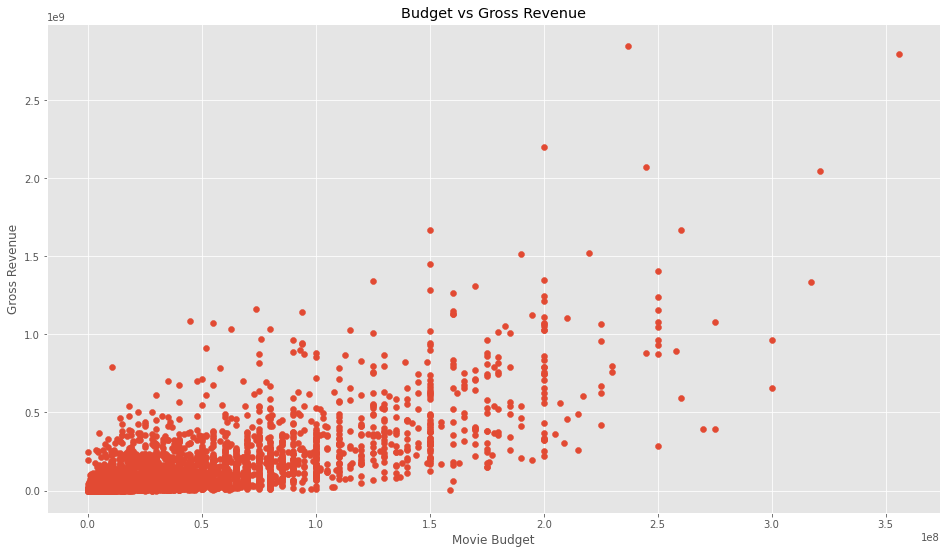

In [154]:
# Let's start with the budget by building a Scatter plot (budget vs gross)

plt.figure(figsize=(16,9))
plt.scatter(x = df['budget'], y= df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

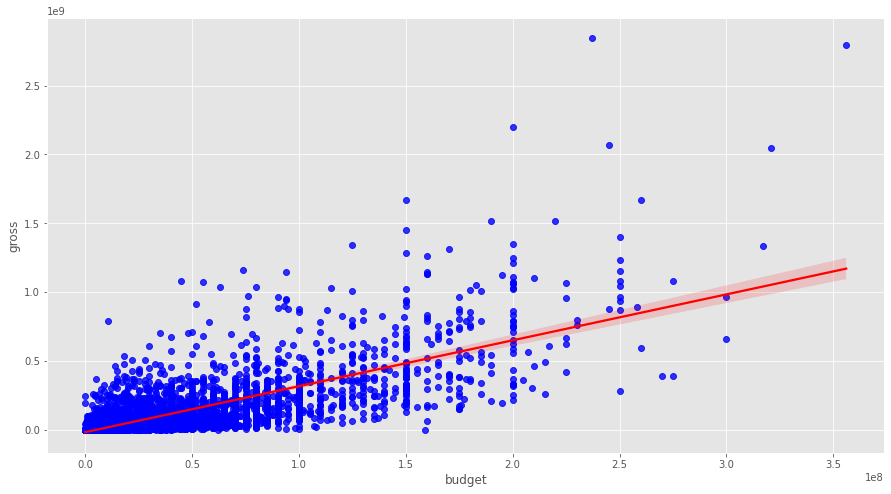

In [155]:
# Adding a regression plot Budget vs Gross Revenue using Seaborn, to better look into the 
# relationship between the variables. Applying some formatting to make it more visual.

plt.figure(figsize = (15,8))
sns.regplot(x='budget',y='gross', data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})

In [156]:
# By looking at the regression line, we can see that there is a positive correlation between the variables.
# Let's now calculate the strength of that correlation (Pearson is utilized)

r, p = scipy.stats.pearsonr(df['budget'],df['gross'])
print(r)

# Being the value of the correlation coefficient (r), greater than 0.6, we could say that there is a strong positive relationship between the variables

0.7402465439219631


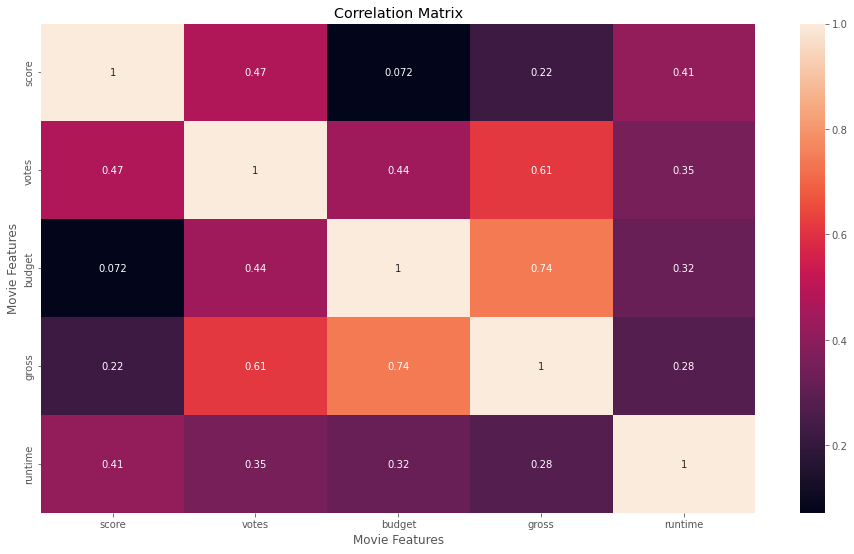

In [157]:
# Let's now visualize the correlation matrix

correlation_matrix = df.corr(method='pearson')
plt.figure(figsize = (16,9))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [158]:
# Let's look at the next variable, `company`.

df.dtypes

# The `company` column is an object, therefore, we will need to somehow convert it into a number.
# To do so, we could assign a unique code to those columns that are of object type.

name              object
rating            object
genre             object
year              object
score            float64
votes              int64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime            int64
date_released     object
dtype: object

In [159]:
# Let's use a "for" loop to convert these

df_numeric = df

for col_name in df_numeric:
    if(df_numeric[col_name].dtype == 'object'):
       df_numeric[col_name] = df_numeric[col_name].astype('category')
       df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,date_released
5445,386,5,0,29,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,496
7445,388,5,0,39,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,124
3045,4909,5,6,17,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,502
6663,3643,5,0,35,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,498
7244,389,5,0,38,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,132


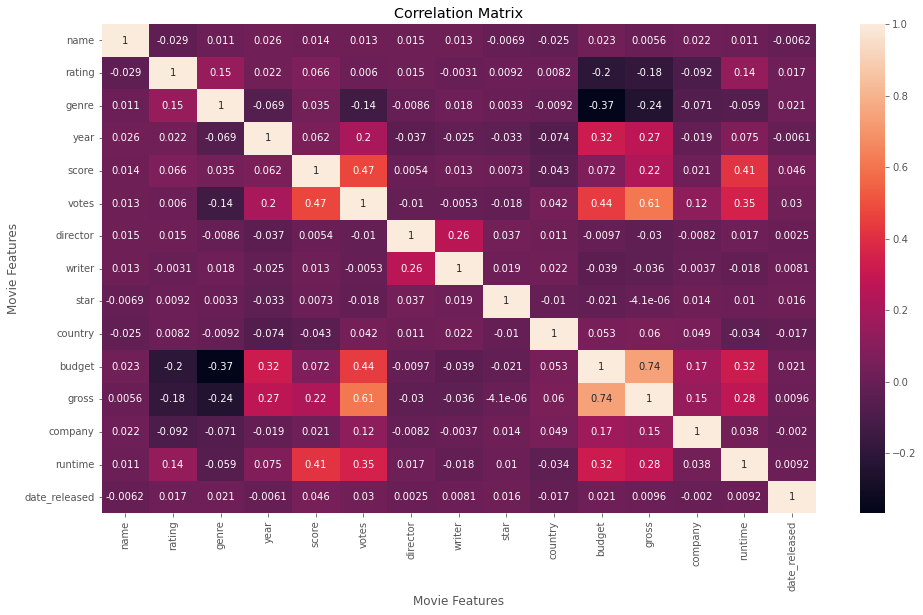

In [160]:
# Let's now replot the correlation matrix with the newly converted values.
# It will now be larger, as every column has now a numeric code

correlation_matrix = df_numeric.corr(method='pearson')
plt.figure(figsize = (16,9))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [161]:
# Let's now identify those pairs of variables that have a strong correlation (r > 0.6)
# counting out the variables relationship with themselves (r=1)

pairs = df_numeric.corr().unstack()

sorted_pairs = pairs.sort_values()


strong_correlation = sorted_pairs[(sorted_pairs > 0.6) & (sorted_pairs != 1)]

strong_correlation

votes   gross     0.614751
gross   votes     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64

In [162]:
# Let's now calculate the strength of the correlation between 
# company and gross revenue (Pearson is utilized)

r, p = scipy.stats.pearsonr(df['company'],df['gross'])
print(r)

# Company and gross revenue have a correlation coefficient of 0.15, which indicates a low correlation, opposed to our hypothesis.
# Additionally, we can then conclude that votes and budget have the strongest correlation to gross revenue (0.61 and 0.74, respectively)


0.1495525875340498
